**Problema 8** (Aproximare Pade rationala). Aproximarea Pade rationala este cea mai buna aproximare a unei functii printr-o functie rationala de ordin $(m, n)$
dat. Se defineste ca fiind o aproximare rationala de grad $(m, n)$ dat care reproduce valorile functiei si derivatelor ei pana la ordinul $m + k$. Ea da adesea aproximari mai bune decaat seriile Taylor trunchiate si uneori lucreaza chiar si atunci cand seria Taylor nu converge! In loc sa utilizam polinoame de grad mare, putem utiliza caturi de polinoame de grad mic. Aceste aproximari se numesc aproximari rationale. Fie

$$f(x) = \frac{p_m(x)}{q_k(x)} = \frac{\sum_{i=0}^{m} a_i x^i}{\sum_{j=0}^{k} b_j x^j} = R_{m,k}(x), $$

unde $b_0 = 1$.

Aici am normalizat prin $b_0 \ne 0$ iar valorile lui $m$ si $k$ se presupun a fi modeste.

Alegem cei $k$ coeficienti $b_j$ ¸si cei $m + 1$ coeficienti $a_i$ din $R_{m,k}$ astfel incat $R_{m,k}$ sa reproduca valorile lui $f$ si ale unui numar specificat de derivate ale ei in punctul fixat $x = 0$.

Construim intai seria Maclaurin trunchiata $\sum_{i=0}^{n} c_i x^i$, unde $ci = \frac{f^{(i)}(0)}{i!}$ si $c_i = 0$ pentru $i < 0$. Apoi, egalam primele $m + k + 1$
derivate ale lui $R_{m,k}$ in raport cu $x$ in $x = 0$ cu primii $m + k + 1$ coeficienti $c_i$. Se obtine sistemul:

$
\begin{bmatrix}
c_{m} & c_{m-1} & \dotsb & c_{m-(k-2)} & c_{m-(k-1)} \\
c_{m+1} & c_{m} & \dotsb & c_{m-(k-3)} & c_{m-(k-2)} \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
c_{m+(k-2)} & c_{m+(k-3)} & \dotsb & c_{m} & c_{m-1} \\
c_{m+(k-1)} & c_{m+(k-2)} & \dotsb & c_{m+1} & c_{m} \\
\end{bmatrix}\begin{bmatrix} 
b_1 \\ b_2 \\ \vdots \\ b_{k-1} \\ b_k 
\end{bmatrix} = \begin{bmatrix} 
-c_{m+1} \\ -c_{m+2} \\ \vdots \\ -c_{m+(k-1)} \\ -c_{m+k} 
\end{bmatrix}$


Deoarece $b_0 = 1$, rezolvand acest sistem de dimensiune $k \times k$ vom obtine
coeficientii $b_1, b_2, \dotsc , b_k$. Valorile lui $a_0, a_1, \dotsc , a_m$ se obt¸in din
$a_j = \sum_{\lambda=0}^{j} c_{j-\lambda}b_{\lambda} (j=0,\dotsc,m)$


De notat ca $a_j = 0$ pentru $j > m$ si $b_j = 0$ pentru $j > k$. De asemenea,
daca $k = 0$, atunci $R_{m,0}$ este seria Maclaurin trunchiata a lui $f$. Mai mult,
aproximarea Pade poate avea singularitati.


(a) Implementati aproximarea Pade pentru $f$, $k$, $m$ date.

In [168]:
def pade(f,k,m):
    x = var('x')
    c = [0]*(m+k+1)
    macl = taylor(f, x, 0, m+k)
    for ci, i in macl.coefficients():        
        c[i] = ci
    #show(c)    
    b = var("b", n=k+1, latex_name="b")        
    
    eqs = []
    
    for i in range(k):
        expr = 0        
        for j in range(k):
            c_index = m+(i-j)
            if c_index>0:                
                expr += c[c_index] * b[j+1]
        eqs.append(expr == -c[m+i+1])        
            
    #show(eqs)        
    sol = solve(eqs, *b)[0][1:]
    #show(sol)
    b = [1] + list(map(lambda e:e.right(), sol))    
             
    qk = sum([b[i]*(x**i) for i in range(k+1)])
    
    def get_a(j):
        nonlocal m,c,b        
        a = 0
        if j>m: 
            return a
        for l in range(j+1):            
            if j<l or l>k: continue            
            a += c[j-l] * b[l]
        return a
    a = list(map(get_a, range(m+1)))
    show("a = ",a,", b = ", b)
    pm = sum([a[i]*(x**i) for i in range(m+1)])
            
    #show(qk)
    #show(pm)
    return pm, qk, pm/qk

(b) Determinati functiile rationale $R_{1,1}(x)$ si $R_{2,2}(x)$ pentru $f(x) = e^x$. Reprezentati grafic si comparati graficele lui $f(x) = e^x$, $R_{1,1}(x)$ si $R_{2,2}(x)$. Sunt satisfacatoare aceste aproximatii rationale ale lui $e^x$ pe $[−1, 1]$? Cum se comporta comparativ cu seriile Maclaurin trunchiate din problemele precedente?


'a = ' [1, 1/2] ', b = ' [1, -1/2]

'R1 = ' -(x + 2)/(x - 2)

'a = ' [1, 1/2, 1/12] ', b = ' [1, -1/2, 1/12]

'R2 = ' (x^2 + 6*x + 12)/(x^2 - 6*x + 12)

'a = ' [1, 1/2, 1/10, 1/120] ', b = ' [1, -1/2, 1/10, -1/120]

'R3 = ' -(x^3 + 12*x^2 + 60*x + 120)/(x^3 - 12*x^2 + 60*x - 120)

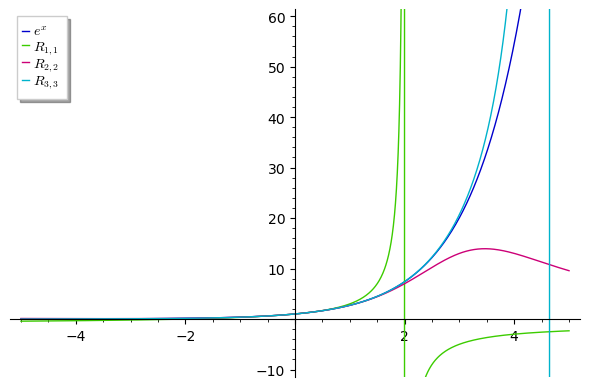

In [184]:
p1, q1, R1 = pade(e^x, 1, 1)
show("R1 = ", R1)
p2, q2, R2 = pade(e^x, 2, 2)
show("R2 = ", R2)
p3, q3, R3 = pade(e^x, 3, 3)
show("R3 = ", R3)

funcs = [e^x, R1, R2, R3]
labels = ["$e^x$", "$R_{1,1}$", "$R_{2,2}$", "$R_{3,3}$" ]

show(plot(funcs, (x, -5,5), ymin=-10, ymax=60, legend_label=labels, color="automatic"))

**Observatie** Aproximarea Pade ofera rezultate mult mai bune pe $[-1,1]$ comparativ cu seriile Maclaurin trunchiate.

(c) Repetati pentru aproximarile $R_{2,2}(x)$ ¸si $R_{3,1}(x)$ ale functiei $g(x) = \ln(1 +x)$.

'a = ' [0, 1, 1/2] ', b = ' [1, 1, 1/6]

'R22 = ' 3*(x^2 + 2*x)/(x^2 + 6*x + 6)

'a = ' [0, 1] ', b = ' [1, 1/2, -1/12, 1/24]

'R31 = ' 24*x/(x^3 - 2*x^2 + 12*x + 24)

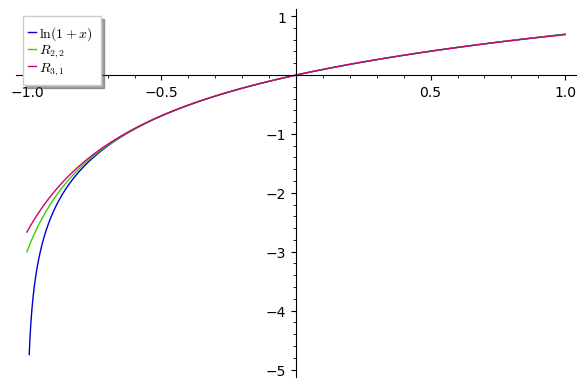

In [188]:
p1, q1, R1 = pade(ln(1+x), 2, 2)
show("R22 = ", R1)
p2, q2, R2 = pade(ln(1+x), 3, 1)
show("R31 = ", R2)

funcs = [ln(1+x), R1, R2]
labels = ["$\\ln(1+x)$", "$R_{2,2}$", "$R_{3,1}$"]

show(plot(funcs, (x, -1,1), ymin=-5, ymax=1, legend_label=labels, color="automatic"))

**Observatie** Convergenta in jurul lui $0$ este mult mai rapida data de aproximarea cu polinoame Taylor.